# Predictive Modeling with Linear Regression Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
import pandas as pd
data = pd.read_csv("used_device_data.csv")
data

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


## Data Overview

- Observations
- Sanity checks

In [ ]:
#view first few rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#checking types of data per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# checking shape of the data
data.shape

(3454, 15)

In [ ]:
#getting statistical summary for the variables
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
#cheking for null data
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


###Observations:

- The dataset is quite large, with around 3,400 observations and several
technical and price-related variables. It gives enough data to explore patterns and predictions.
- The normalized prices show some variability, especially for new phone prices compared to used ones. This suggests that new devices differ more across models, while used prices tend to converge more.
- Some technical variables present extreme values, such as very high battery capacity, memory, or weight. These outliers likely correspond to atypical devices and may affect statistical analysis if not treated carefully.
- There are no missing values in key variables like prices, days used, or release year. However, some hardware specifications have missing data, like main camara, weight and battery.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

What does the distribution of normalized used device prices look like?


In [ ]:
#preparing data
norm_used_price = data["normalized_used_price"]


<Axes: xlabel='normalized_used_price', ylabel='Count'>

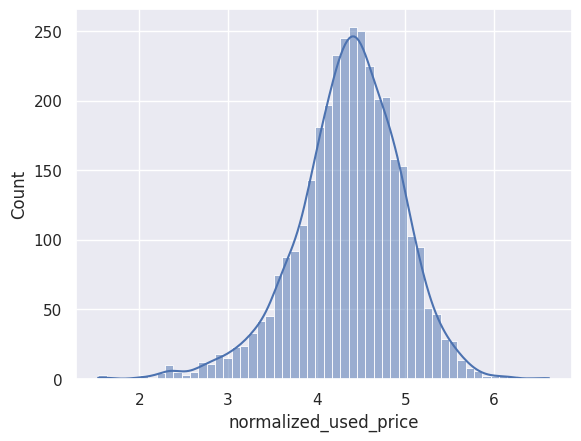

In [ ]:
#ploting distribution
histoplot = sns.histplot(norm_used_price, kde=True)
histoplot

####Observations

- The normalized used price follows a roughly bell-shaped (near normal) distribution.
- Most devices are concentrated around the mid-price range, with fewer very cheap or very expensive devices.
- This suggests the used market is dominated by mid-range devices, not extreme outliers.

What percentage of the used device market is dominated by Android devices?

In [ ]:
#calculating % of market by os
android_perc = data["os"].value_counts(normalize=True)
android_perc

,proportion
os,
Android,0.930515
Others,0.039664
Windows,0.019398
iOS,0.010423


<Axes: xlabel='Operating system', ylabel='% of market'>

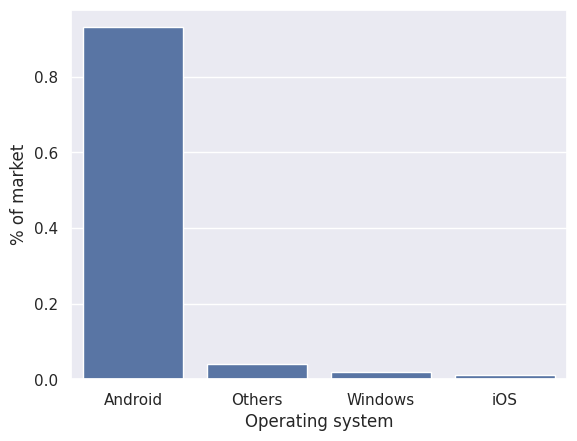

In [ ]:
#ploting % of market by os
barplot = sns.barplot(x=android_perc.index, y=android_perc.values)
barplot.set_ylabel('% of market')
barplot.set_xlabel('Operating system')


barplot

####Observations:
- Android devices dominate the used market with around 93% share.
- iOS, Windows, and other operating systems together form only a very small fraction.


How does the amount of RAM vary with the brand?

In [ ]:
#preparing/calculating the data
ram_by_brand = data.groupby("brand_name")["ram"].agg(["median", "std"])
ram_by_brand


,median,std
brand_name,,
Acer,4.00,0.500196
Alcatel,4.00,1.263730
Apple,4.00,0.606977
Asus,4.00,0.600997
BlackBerry,4.00,0.799503
Celkon,0.25,1.831891
Coolpad,4.00,0.213201
Gionee,4.00,0.501115
Google,4.00,0.915475


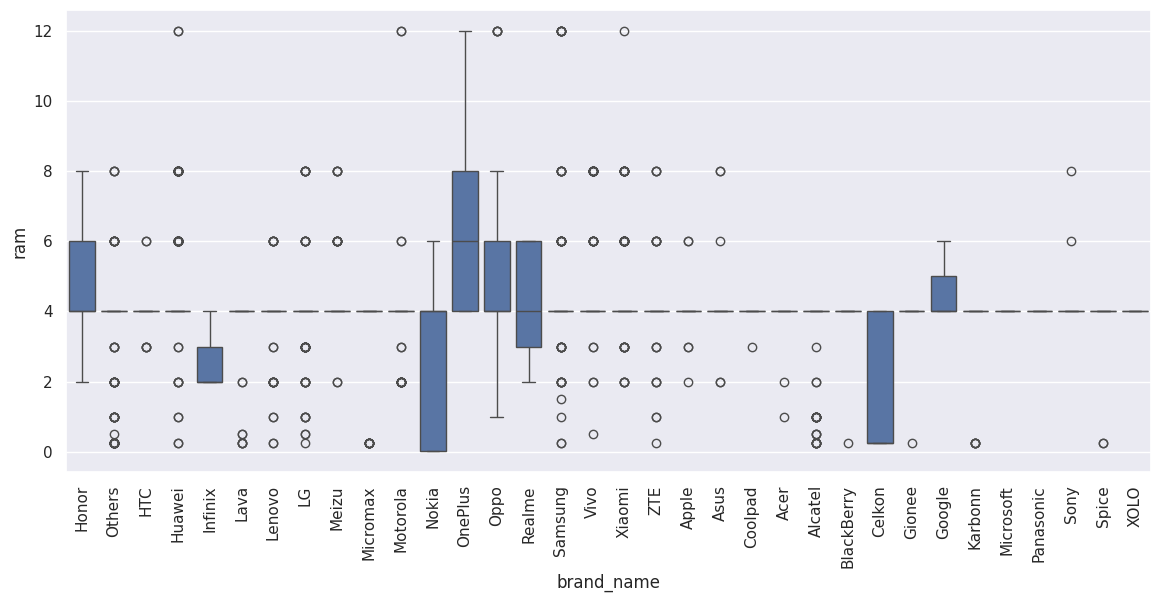

In [ ]:
#ploting the std of the ram by brand
plt.figure(figsize=(14,6))
sns.boxplot(x="brand_name", y="ram", data=data)
plt.xticks(rotation=90)
plt.show()


####Observations:
- RAM capacity varies significantly across brands.
- Brands like OnePlus, Samsung, Realme, and Oppo tend to offer higher RAM on average.
- Budget brands (e.g. Celkon, Karbonn, Lava) mostly cluster at lower RAM levels, with some outliers.

How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
#preparing data
large_battery = data[data["battery"] > 4500]
large_battery


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


In [ ]:
large_battery[["battery", "weight"]]





,battery,weight
3,7250.0,480.0
4,5000.0,185.0
11,5000.0,185.0
19,5100.0,173.0
20,5100.0,173.0
...,...,...
3420,5000.0,222.0
3421,5000.0,220.0
3434,6000.0,188.0
3448,6000.0,240.0


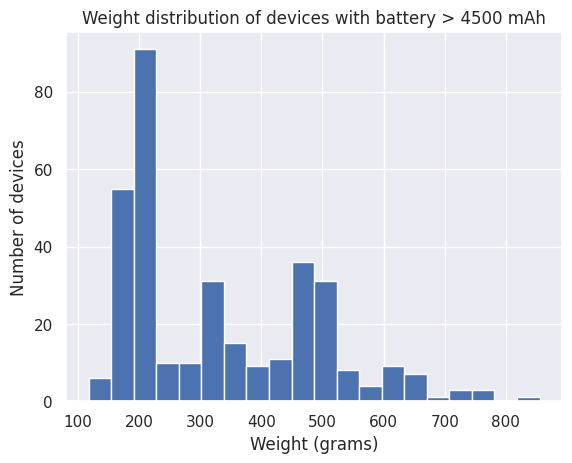

In [ ]:
#ploting distributiom
plt.figure()
plt.hist(large_battery["weight"], bins=20)
plt.xlabel("Weight (grams)")
plt.ylabel("Number of devices")
plt.title("Weight distribution of devices with battery > 4500 mAh")
plt.show()


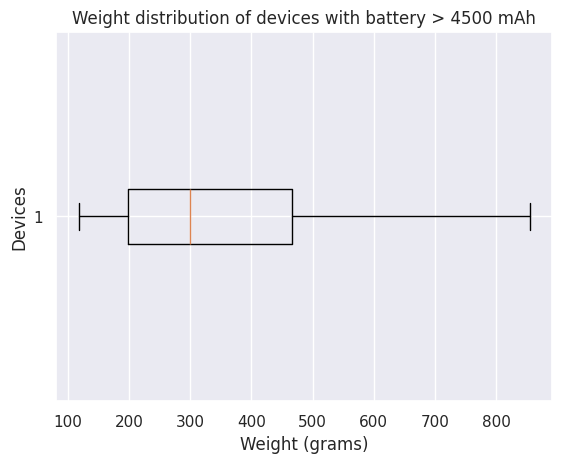

In [ ]:

plt.figure()
plt.boxplot(large_battery["weight"], vert=False)
plt.xlabel("Weight (grams)")
plt.ylabel("Devices")
plt.title("Weight distribution of devices with battery > 4500 mAh")
plt.show()


####Observations:
- Devices with batteries larger than 4500 mAh are clearly heavier on average.
- Most of these devices fall in the 200–500g weight range, with some very heavy outliers.


Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
#select only screen larger than 6 inches
large_screens = data[data["screen_size"] > 6]


In [ ]:
#count large screen by brand
count_by_brand = large_screens.groupby("brand_name").size()
count_by_brand


,0
brand_name,
Acer,51
Alcatel,115
Apple,39
Asus,122
BlackBerry,21
Celkon,25
Coolpad,22
Gionee,56
Google,15


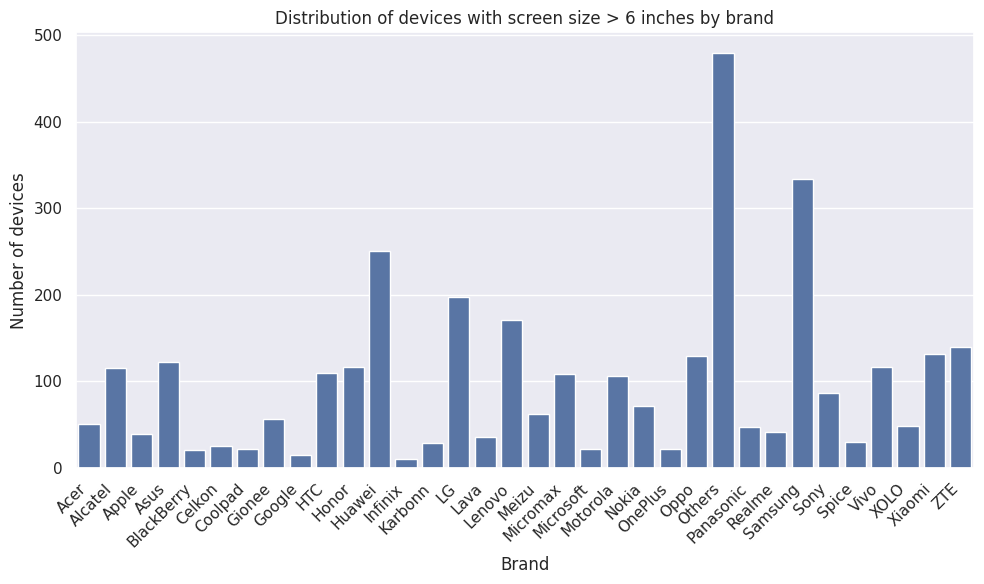

In [ ]:
#plot by brand
plt.figure(figsize=(10,6))
sns.barplot(x=count_by_brand.index, y=count_by_brand.values)
plt.xlabel("Brand")
plt.ylabel("Number of devices")
plt.title("Distribution of devices with screen size > 6 inches by brand")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

####Observations:
- Large-screen devices (>6 inches) are widely available across brands.
- Brands like Samsung, LG, Huawei, and Others category dominate this segment.
- This shows that big screens are now mainstream, not a premium-only feature.

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
#select only cameras greater than 8MP
great_cameras = data[data["selfie_camera_mp"] > 8]
great_cameras

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Samsung,Android,15.34,yes,no,12.0,16.0,32.0,3.0,4000.0,169.0,2019,369,4.760377,5.049151
3439,Samsung,Android,15.34,yes,no,12.0,32.0,64.0,4.0,4000.0,169.0,2019,315,5.137092,5.443240
3440,Samsung,Android,15.44,yes,no,12.0,10.0,256.0,12.0,4300.0,196.0,2019,489,5.200153,6.509499
3441,Samsung,Android,15.32,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,2019,429,5.205050,6.250940


In [ ]:
#count cameras greater than 8MP by brand
count_by_brand2 = great_cameras.groupby("brand_name").size()
count_by_brand2

,0
brand_name,
Acer,1
Asus,6
BlackBerry,2
Coolpad,3
Gionee,4
HTC,20
Honor,41
Huawei,87
Infinix,4


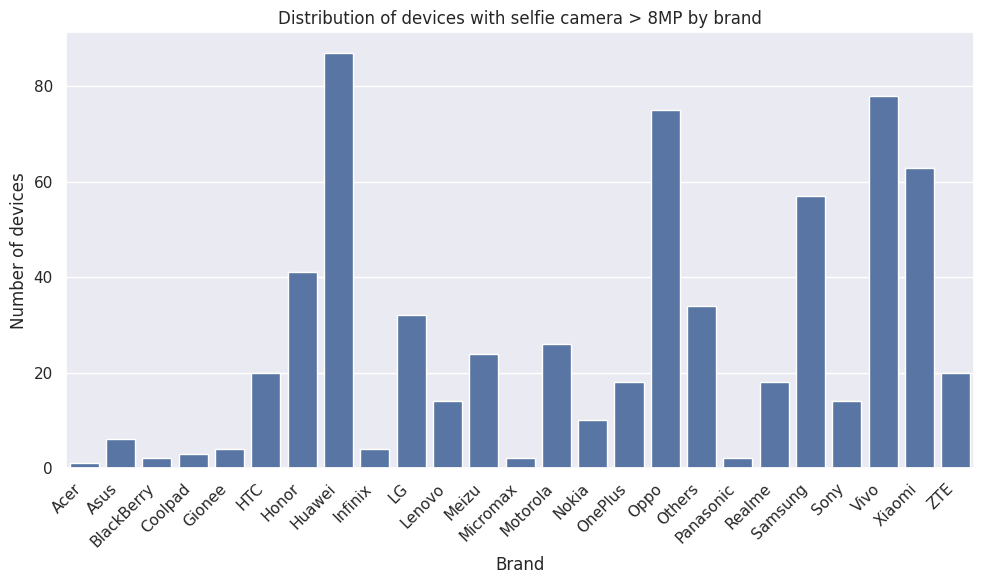

In [ ]:
#plot distribution
plt.figure(figsize=(10,6))
sns.barplot(x=count_by_brand2.index, y=count_by_brand2.values)
plt.xlabel("Brand")
plt.ylabel("Number of devices")
plt.title("Distribution of devices with selfie camera > 8MP by brand")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

####Observations:
- Devices with high-resolution selfie cameras are common across many brands.
- Huawei, Vivo, Xiaomi, Oppo, and Samsung have the highest counts.
- Selfie camera quality has become a standard competitive feature, especially in mid-range phones.

Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
#explore numeric correlations
corr = data.corr(numeric_only=True)
corr


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


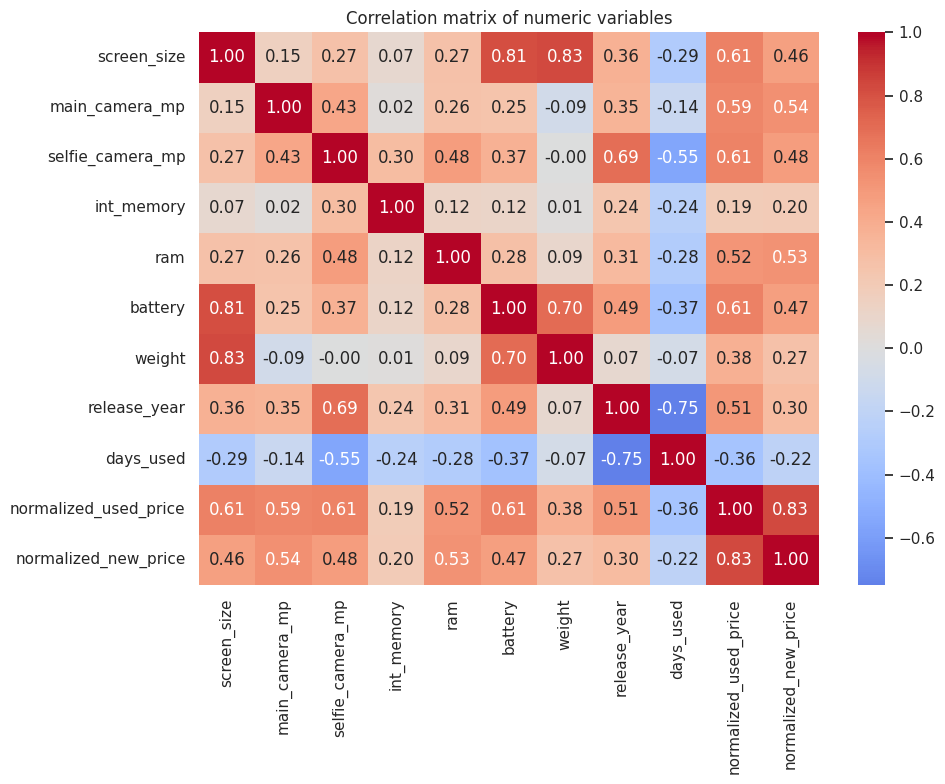

In [ ]:
#plot heatmap of correlations

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix of numeric variables")
plt.tight_layout()
plt.show()


####Observatoions:

Strong positive correlation with:
- Normalized new price (strongest driver)
- Screen size
- Main camera MP and selfie camera MP
- RAM

Strong negative correlation with:
- Days used (older devices lose value faster)

This shows that original price, hardware specs, and device age are the key price drivers.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#treating missing data: median imputation

num_cols = [
    "main_camera_mp", "selfie_camera_mp",
    "int_memory", "ram", "battery", "weight"
]

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())



In [ ]:
#making sure all quantitative variables numeric
numeric_cols = [
    "screen_size",
    "battery",
    "weight",
    "ram",
    "int_memory",
    "main_camera_mp",
    "selfie_camera_mp",
    "release_year",
    "days_used",
    "normalized_used_price",
    "normalized_new_price"
]

data[numeric_cols] = data[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)


####Observations:
Data Preprocessing
- Only essential preprocessing steps were applied to preserve the original structure of the data.
- Missing values in key numerical variables were handled using median imputation, which is robust to outliers.
- Additionally, all quantitative variables were explicitly coerced to numeric format to ensure consistency and avoid type-related issues during modeling.
- No further feature engineering or outlier treatment was performed, as exploratory analysis did not indicate the need for additional transformations.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
#checking that there is no null data
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


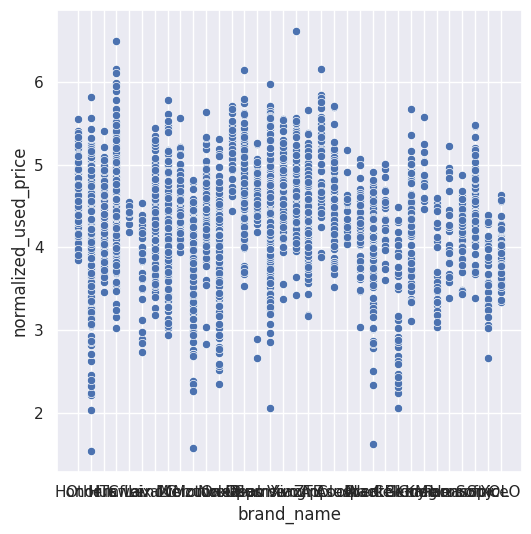

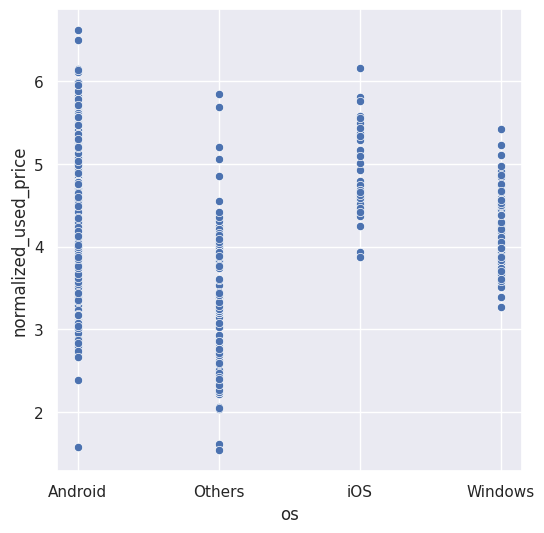

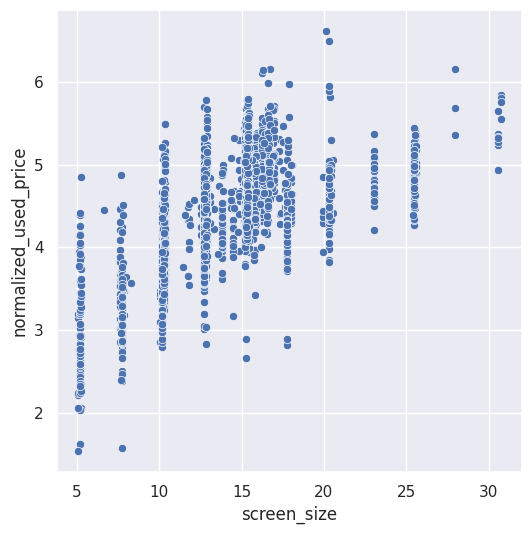

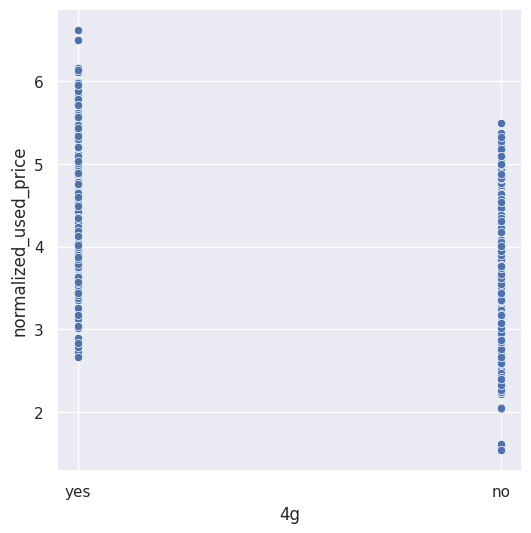

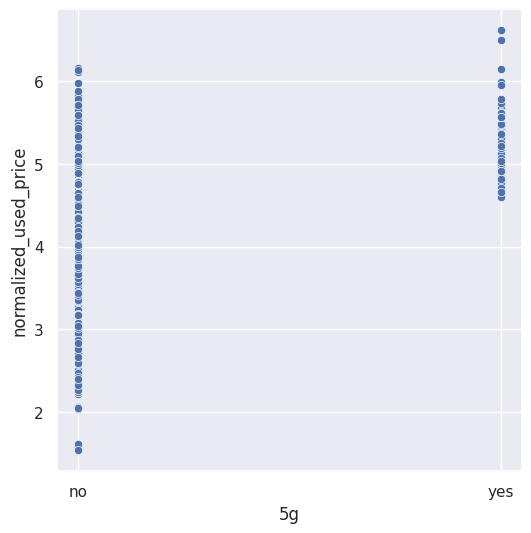

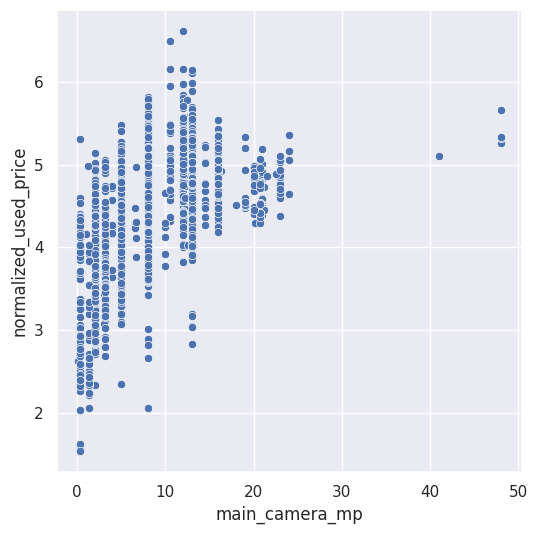

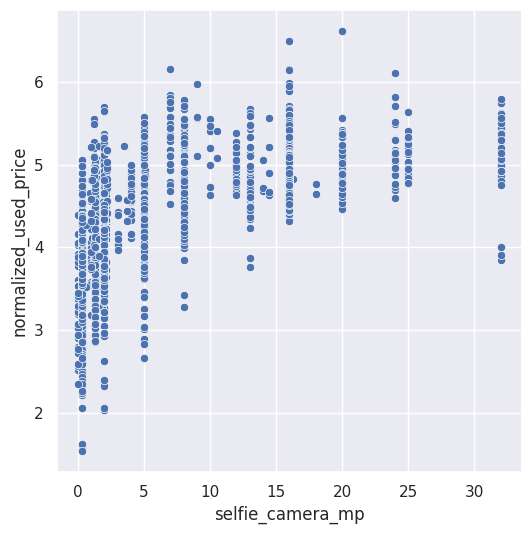

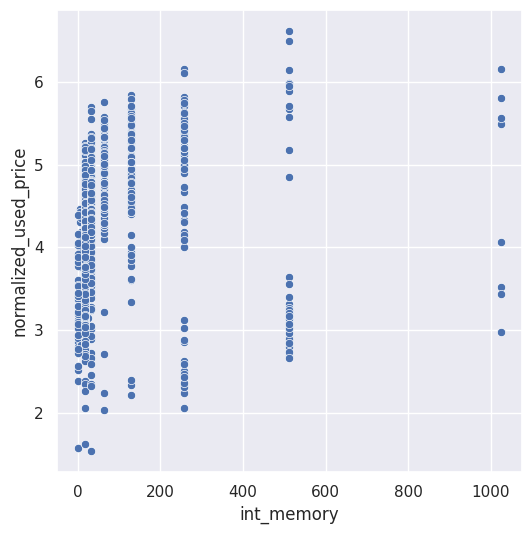

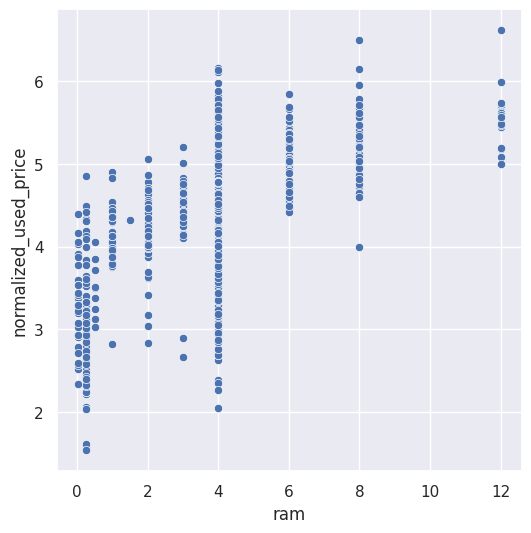

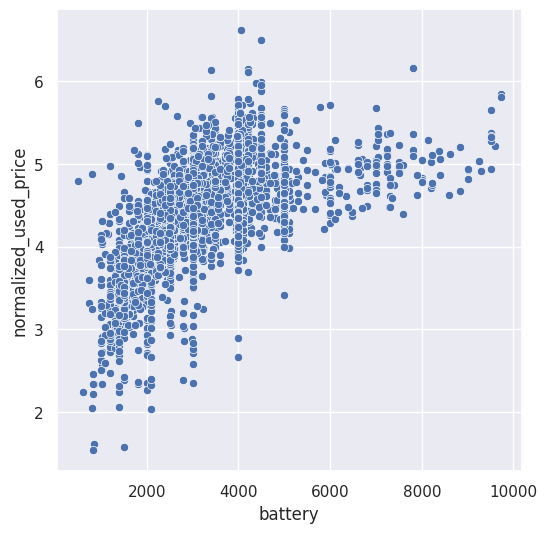

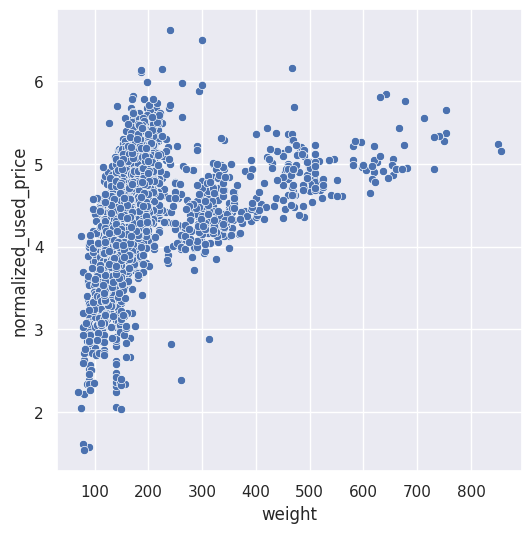

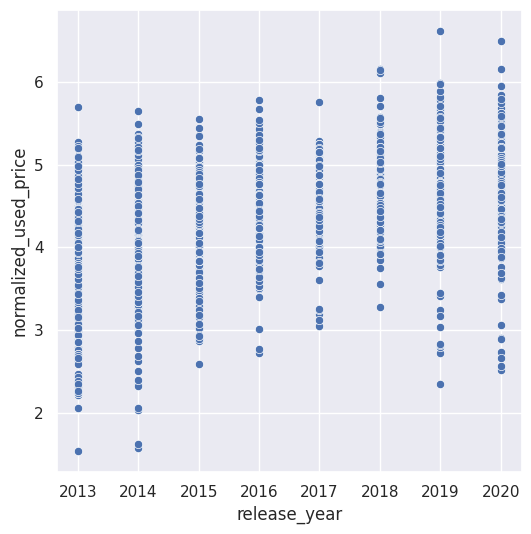

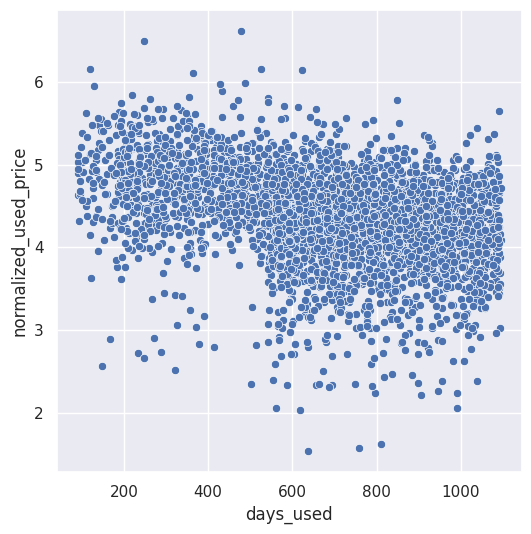

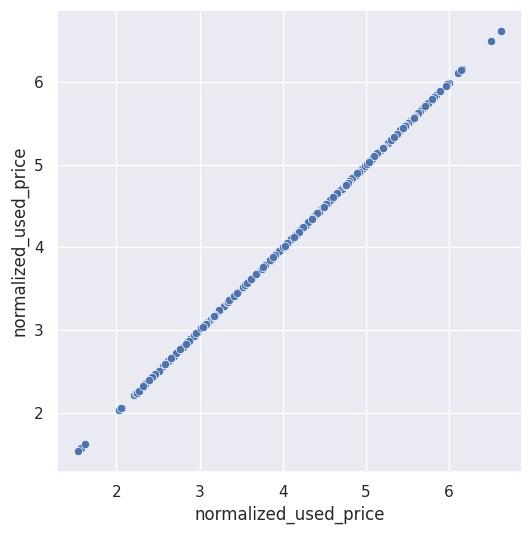

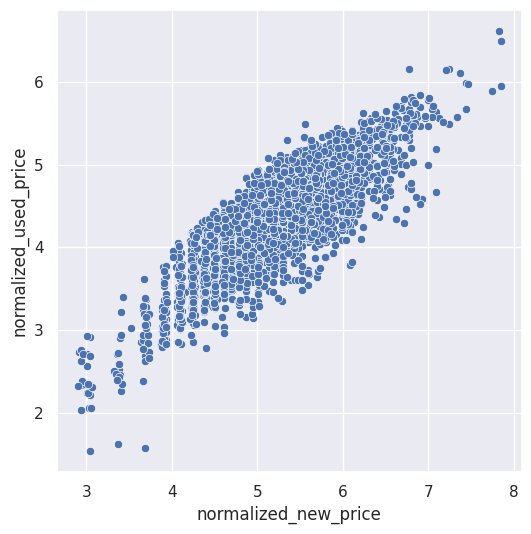

In [ ]:
# plot the scatterplots of median price with all the features

for i in data.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=data, x=i, y="normalized_used_price")
    plt.show()

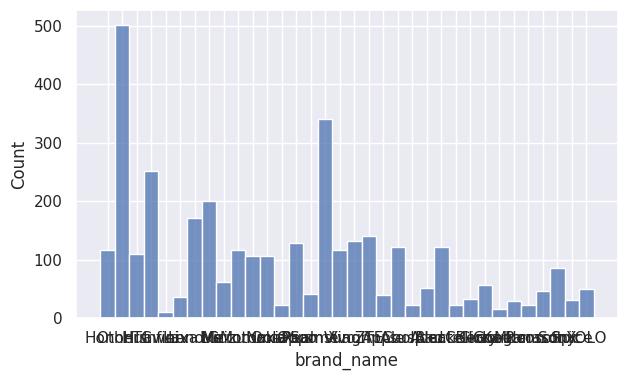

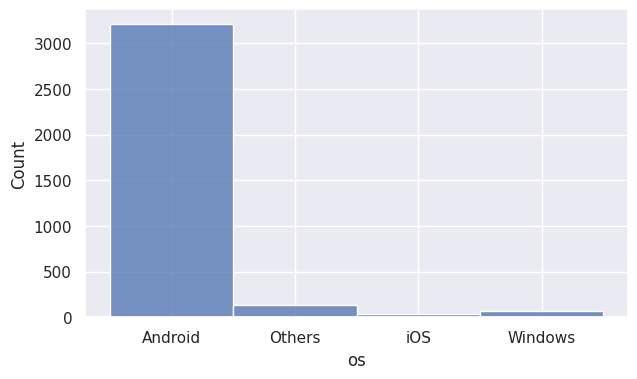

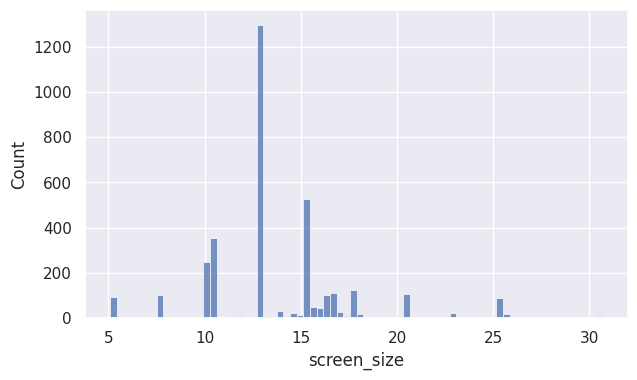

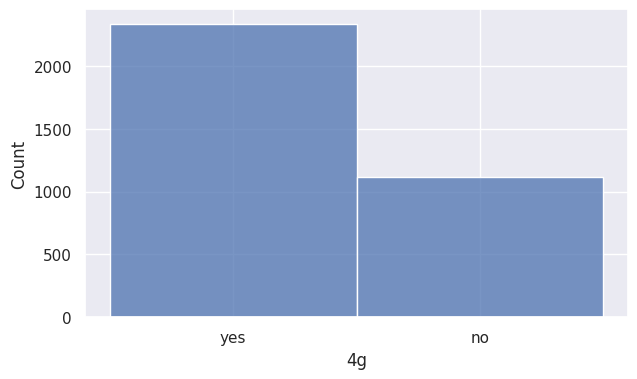

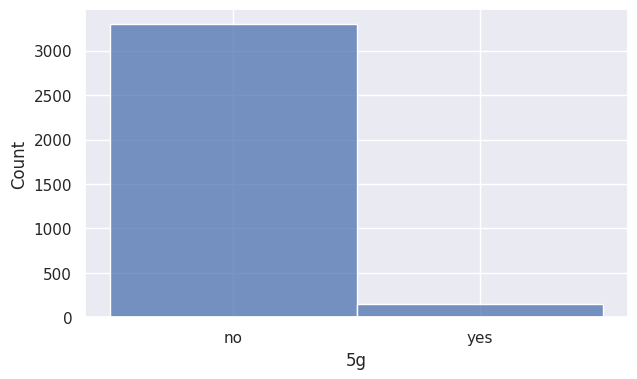

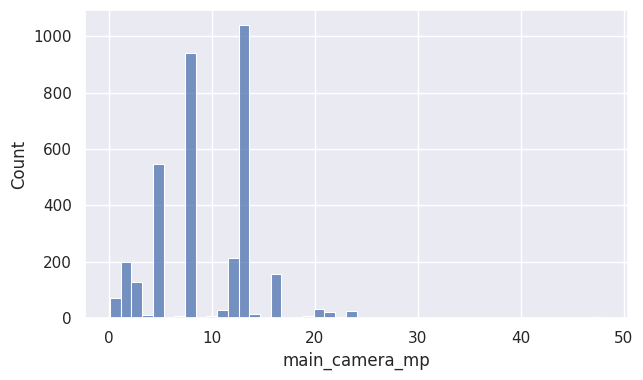

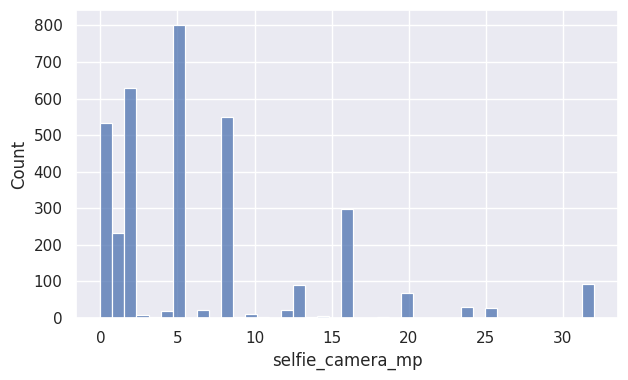

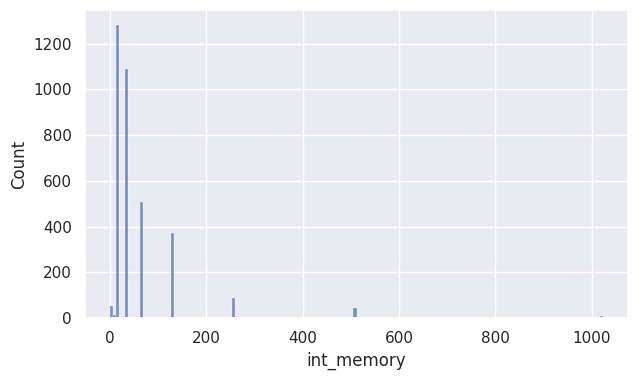

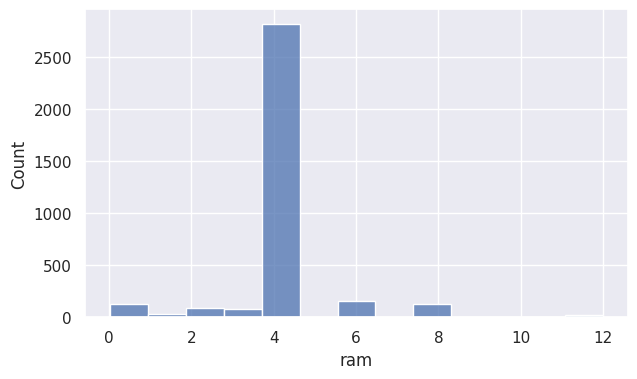

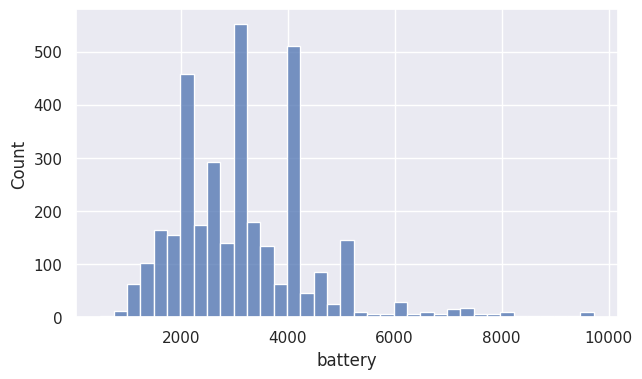

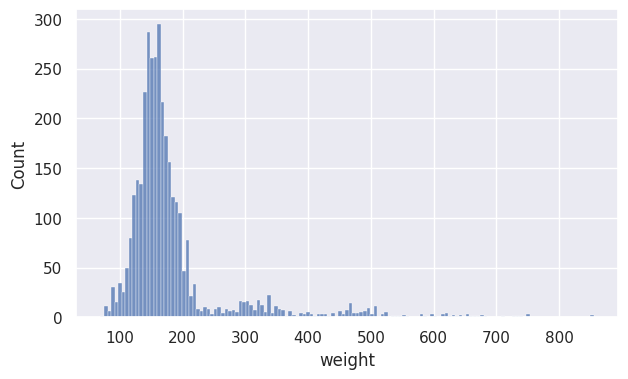

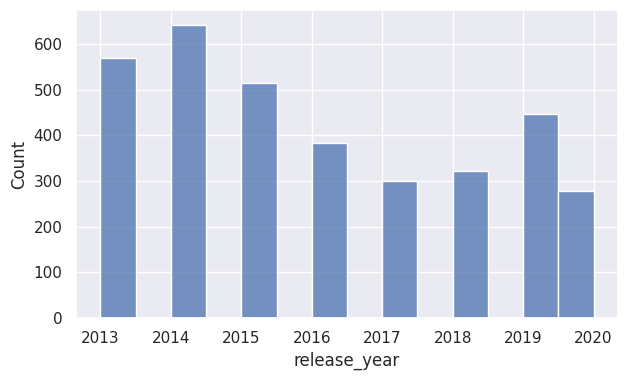

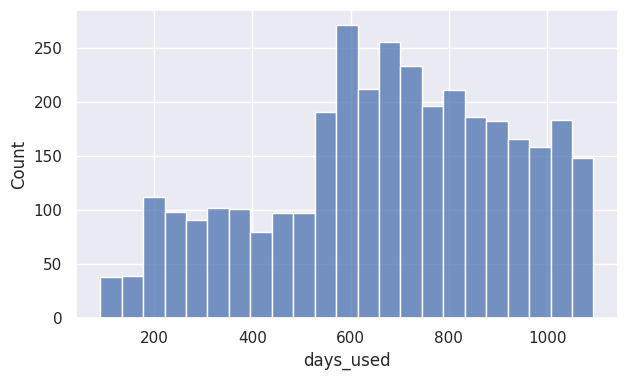

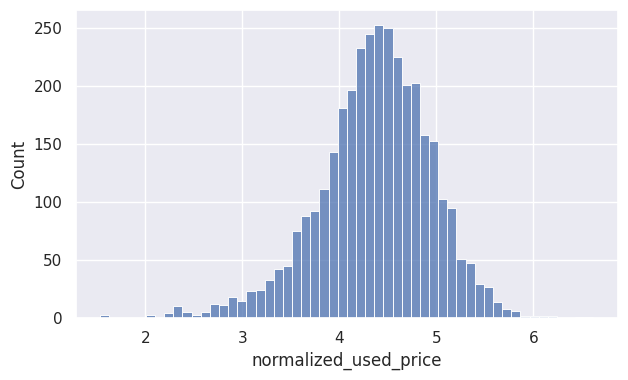

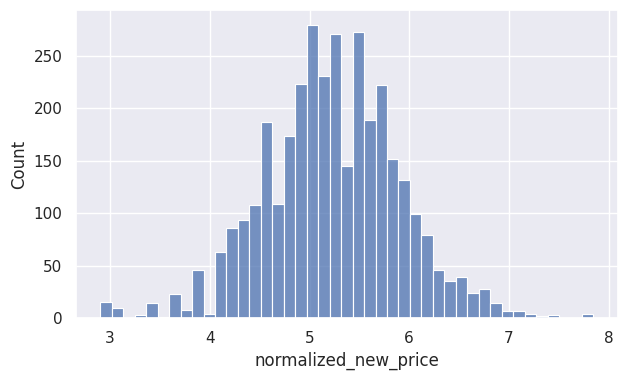

In [ ]:
# plot all the columns to look at their distributions

import seaborn as sns

for i in data.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i)
    plt.show()

## Model Building - Linear Regression

In [ ]:
# splitting the data into the dependent and independent variables
X = data.drop("normalized_used_price", axis=1)
y = data["normalized_used_price"]


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns,
    drop_first=True
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
# this adds the constant term to the dataset
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

###check for non numeric arrays and convert everything to numeric to then fit the model

In [ ]:
X_train.dtypes[X_train.dtypes == "object"]


,0


In [ ]:
X_train.dtypes[X_train.dtypes == "bool"]


,0
brand_name_Alcatel,bool
brand_name_Apple,bool
brand_name_Asus,bool
brand_name_BlackBerry,bool
brand_name_Celkon,bool
brand_name_Coolpad,bool
brand_name_Gionee,bool
brand_name_Google,bool
brand_name_HTC,bool
brand_name_Honor,bool


In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [ ]:
#Make the linear model using statsmodels OLS and print the model summary
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                           06:01:57   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
#get the value of the coefficient of determination
model.rsquared


np.float64(0.8449333686368374)

In [ ]:
#get the value of the adjusted coefficient of determination
r2_test = r2_score(y_test, y_pred)
print("Test R²:", r2_test)


Test R²: 0.8425474282446466


In [ ]:
#Get the predictions on test set
y_pred = model.predict(X_test)
y_pred.head()

,0
866,4.220792
957,3.277339
280,4.255531
2150,4.745019
93,4.507480


In [ ]:
#Calculate MSE for training set
print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    mean_squared_error(y_train, model.predict(X_train)),
)


The Mean Square Error (MSE) of the model for the training set is  0.05283042682906595


In [ ]:
#Calculate MSE for test set
print(
    "The Mean Square Error (MSE) of the model for the test set is ",
    mean_squared_error(y_test, model.predict(X_test)),
)

The Mean Square Error (MSE) of the model for the test set is  0.05678984979958564


In [ ]:
#Get the RMSE on training set
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  0.2298487042144592


In [ ]:
#Get the RMSE on test set
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  0.23830621015740575


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### TEST FOR MULTICOLLINEARITY

- Test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,3.780344e+06
1,screen_size,7.680705e+00
2,main_camera_mp,2.136597e+00
3,selfie_camera_mp,2.808416e+00
4,int_memory,1.361465e+00
5,ram,2.258272e+00
6,battery,4.073582e+00
7,weight,6.380746e+00
8,release_year,4.884645e+00
9,days_used,2.669393e+00


####Observations:
Variance Inflation Factors indicate mild to moderate multicollinearity among some predictors, particularly between brand and operating system indicators (e.g., Apple and iOS), which is structurally expected. No widespread or severe multicollinearity is observed among the core numerical features, and VIF values remain within acceptable limits for predictive modeling.

In [ ]:
#Drop os_iOS (keep brand)
X = X.drop(columns=["os_iOS"])


In [ ]:
X = X.drop(columns=["brand_name_Others"])


In [ ]:
X.dtypes.value_counts()


,count
bool,36
float64,8
int64,2


In [ ]:
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)


In [ ]:
# Re-split (important after feature changes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

# Add constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit model
model_clean = sm.OLS(y_train, X_train).fit()
print(model_clean.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.7
Date:                   Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                           06:02:00   Log-Likelihood:                 124.12
No. Observations:                   2417   AIC:                            -154.2
Df Residuals:                       2370   BIC:                             117.9
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X_train.columns
vif["VIF"] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif.sort_values("VIF", ascending=False)


,feature,VIF
0,const,3.778034e+06
1,screen_size,7.566460e+00
7,weight,6.343053e+00
8,release_year,4.880935e+00
6,battery,4.069714e+00
10,normalized_new_price,3.121939e+00
3,selfie_camera_mp,2.798121e+00
9,days_used,2.668555e+00
45,4g_yes,2.472204e+00
5,ram,2.242384e+00


####Observations:
Although screen_size and weight show moderately high VIF values, both were retained as they represent distinct and meaningful physical attributes of the device. A certain level of correlation between these features is expected in smartphones and tablets. Their VIF values remain below the critical threshold of 10, indicating acceptable multicollinearity.

### Dropping high p-value variables

- drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.


In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
X_train3 = X_train[selected_features]
X_test3 = X_test[selected_features]

In [ ]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                           06:02:02   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations:
All retained predictors have p-values < 0.05, so they are statistically significant at the 5% level.

### TEST FOR LINEARITY AND INDEPENDENCE

- test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855637,0.231851
1525,4.448399,4.627645,-0.179246
1128,4.315353,4.281712,0.033640
3003,4.282068,4.238675,0.043393
2907,4.456438,4.474552,-0.018114


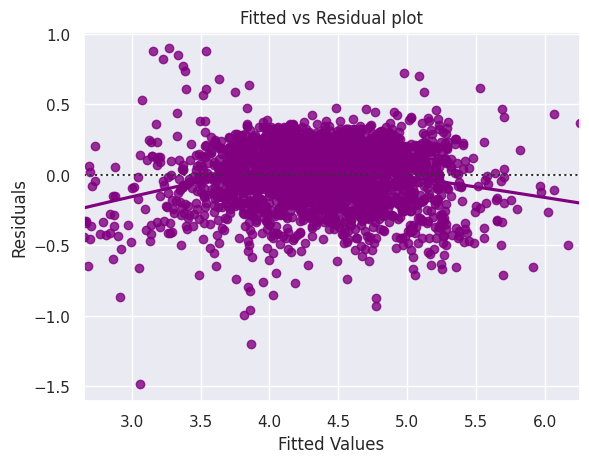

In [ ]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

####Observations

- no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

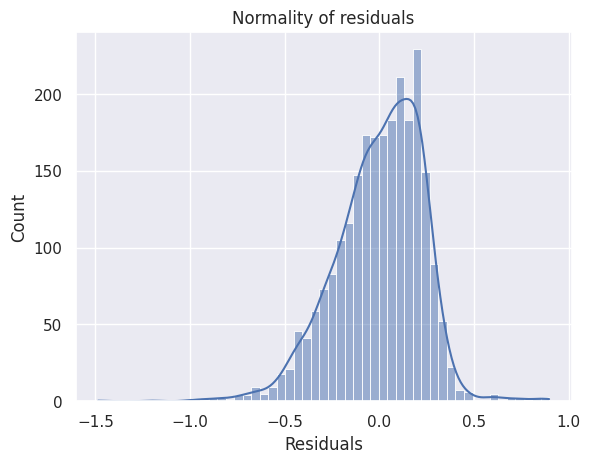

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

####Observations

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

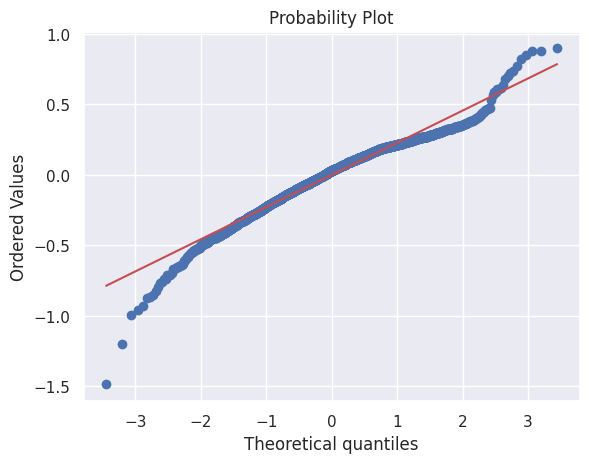

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

####Observations

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9692806004819691), pvalue=np.float64(2.474510663835032e-22))

####Observations

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- test for homoscedasticity by using the goldfeldquandt test.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', np.float64(1.0491450075063853)),
 ('p-value', np.float64(0.20369231172350918))]

####Observations

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Therefore it is time to rebuild the final model**

## Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                           06:02:03   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights and Recommendations

###Inferences:
- A unit increase in screen size increases the used phone price by 0.025 units, keeping all other variables constant.
- A unit increase in main camera resolution (MP) increases the used price by 0.021 units, all else held constant.
- A unit increase in selfie camera resolution (MP) increases the used price by 0.014 units, keeping other variables same.
- A unit increase in RAM increases the used price by 0.021 units, holding all other factors constant.
- A unit increase in battery capacity slightly decreases the used price by a very small amount, keeping other variables constant.
- A unit increase in device weight increases the used price by 0.001 units, all other variables held constant.
- Newer devices (higher release year) have higher used prices, with one-year increase raising price by 0.022 units, ceteris paribus.
- A unit increase in normalized new price increases the used price by 0.423 units, showing strong dependence on original price.
- Devices from Lenovo, Nokia, Realme, and Xiaomi have higher used prices compared to the reference brand, keeping other variables constant.
- Devices running on other operating systems have lower used prices compared to the base OS.
- Devices with 4G support have higher used prices by 0.047 units compared to non-4G devices, all else constant.


###Recommendations for ReCell
- ReCell should strongly use original new price as main anchor for pricing, since it has the highest impact on used price.
- Devices with better specs (screen size, camera MP, RAM) should be prioritized for sourcing, as they consistently retain higher resale value.
- ReCell should focus inventory on newer release year models, because age clearly reduces used price.
- Brands like Xiaomi, Realme, Nokia, Lenovo perform better in resale; these brands should be stocked more aggressively.
- Phones with 4G support should be priced higher than non-4G devices, even if other specs are similar.
- Very large battery capacity does not add value; ReCell should avoid overpaying for battery size alone.
- Heavier phones slightly increase price, but this should be a secondary factor, not a pricing driver.
- Devices running less common operating systems should be discounted to remain competitive.
- ReCell can use this model to build a dynamic pricing tool that adjusts prices automatically based on specs, brand, and age.

___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"


 Burundi_Draft4_GTP_Deterministic_NbS_Policy_Analyzer.ipynb
 Comoros_Draft4_GTP_Deterministic_NbS_Policy_Analyzer.ipynb
 Djibouti_Draft4_GTP_Deterministic_NbS_Policy_Analyzer.ipynb
 EPaniaguaENews_Express_Learner_Notebook_Full_Code2.ipynb
 Ethiopia_Draft4_GTP_Deterministic_NbS_Policy_Analyzer.ipynb
 Kenya_Draft4_GTP_Deterministic_NbS_Policy_Analyzer.ipynb
 PMLR_MLS1_Notebook_AnimeRatings.ipynb
 ReCell_Project_Learner_Notebook_FullCode_EPaniagua.html
 ReCell_Project_Learner_Notebook_FullCode_EPaniagua.ipynb
'SLF_W1_PracticeExercise_SolutioN  (1).ipynb'
 SLF_W2_PracticeExercise_Solution.ipynb


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/ReCell_Project_Learner_Notebook_FullCode_EPaniagua.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ReCell_Project_Learner_Notebook_FullCode_EPaniagua.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 36 image(s).
[NbConvertApp] Writing 2238218 bytes to /content/drive/MyDrive/Colab Notebooks/ReCell_Project_Learner_Notebook_FullCode_EPaniagua.html
